In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
import math
import random
from mnist import MNIST

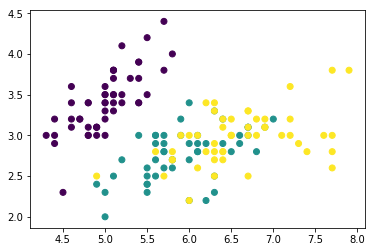

In [3]:
iris = datasets.load_iris()
X = iris.data[:,:2] #First two features of iris dataset
Y = iris.target
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

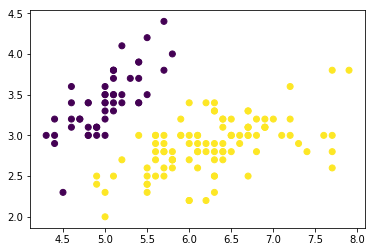

In [4]:
Y = (Y!=0) * 1
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

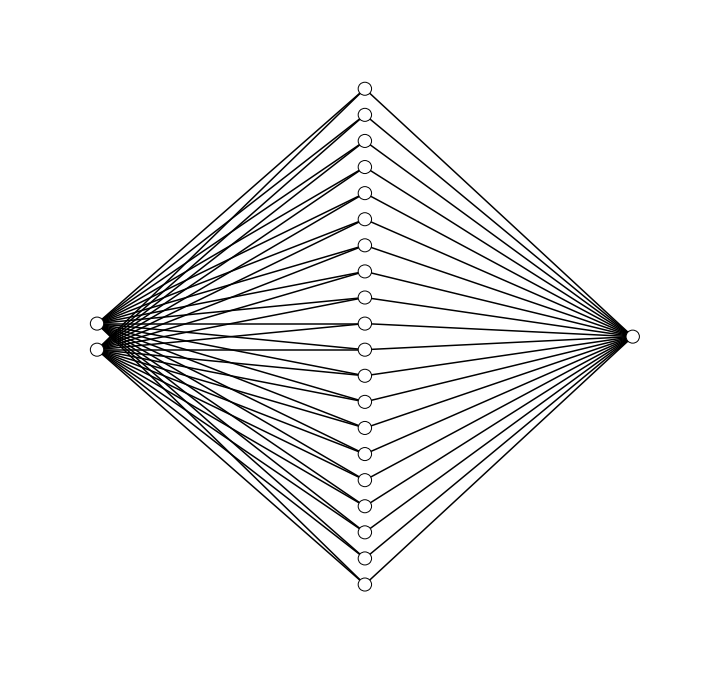

In [5]:
# Neural net visualization taken from https://gist.github.com/craffel/2d727968c3aaebd10359 

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 20, 1])

In [6]:
def activation(x,derivative=False):
    if derivative:
        return 1/2*(1-np.power(x,2))
    return (np.tanh(x)+1) / 2

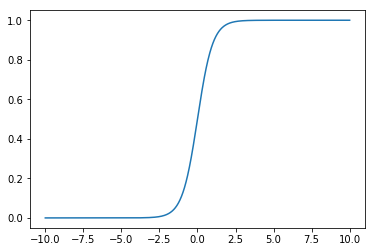

In [7]:
_X = np.linspace(-10,10,1000)
_Y = activation(_X)
plt.plot(_X,_Y)
plt.show()

In [8]:
print(X.shape)
Y = np.array(Y)[:,np.newaxis]
print(Y.shape)

(150, 2)
(150, 1)


In [9]:
def loss_function(hx,y,derivative=False):
    if derivative:
        return -(y-hx)
    return np.sum(np.power(hx-y,2)) / 2

In [10]:
def gradient_descent(X,Y,hidden_layer_num,output_layer_num,learning_rate=0.3,iterations=1000):
    # X: m x n where n = number of features
    # Y: m x c where c = number of classes for classification
    m = X.shape[0]
    n = X.shape[1]
    # Change X to m x (n+1) to add a bias node
    X = np.hstack((np.ones((m,1)),X))
    
    #Initialize randomly between -1 and 1, and add bias
    # (n+1) x h where h = number of neurons in hidden layer
    input_to_hidden_weights = np.random.random((n+1,hidden_layer_num))*2 -1
    
    # (h+1) x c
    hidden_to_output_weights = np.random.random((hidden_layer_num+1,output_layer_num))*2-1
    losses = []
    print_batch = 20
    for i in range(iterations):
        
        delta_hidden = np.zeros((hidden_layer_num+1,1))
        delta_input = np.zeros((n+1,1))
        
        # Forward pass to compute values of X
        hidden_X = activation(np.dot(X,input_to_hidden_weights)) # m x h
        hidden_X = np.hstack((np.ones((m,1)),hidden_X)) # m x (h+1) for bias neuron
        output_X = activation(np.dot(hidden_X,hidden_to_output_weights)) # m x c
        
        # Calculate loss
        loss = loss_function(output_X,Y)
        if i % print_batch == 0:
            print("Iteration #{0} -- Loss: {1}".format(i,loss))
        losses.append(loss)
        
        # Backpropagation
        delta_hidden_to_output = (loss_function(output_X,Y,derivative=True)*activation(output_X,derivative=True)) # m x c
        delta_input_to_hidden = np.dot(delta_hidden_to_output, hidden_to_output_weights[1:,:].T) # m x c . c x h = m x h
        delta_input_to_hidden = delta_input_to_hidden * activation(hidden_X[:,1:], derivative=True) # m x h
        
        #Calculate gradient and descend
        gradient_hidden_to_output_weights = delta_hidden_to_output[:,np.newaxis,:] * hidden_X[:,:,np.newaxis] # m x h+1 x c
        gradient_input_to_hidden_weights = delta_input_to_hidden[:,np.newaxis,:] * X[:,:,np.newaxis] # m x n+1 x h
        
        hidden_to_output_weights -= np.average(gradient_hidden_to_output_weights,axis=0) * learning_rate
        input_to_hidden_weights -= np.average(gradient_input_to_hidden_weights,axis=0) * learning_rate
        
    return (input_to_hidden_weights,hidden_to_output_weights,losses)

(input_to_hidden_weights,hidden_to_output_weights,losses) = gradient_descent(X,Y,5,1)

Iteration #0 -- Loss: 23.234474250348832
Iteration #20 -- Loss: 11.289358835958776
Iteration #40 -- Loss: 10.213404723831497
Iteration #60 -- Loss: 9.018403550247104
Iteration #80 -- Loss: 7.840093052206783
Iteration #100 -- Loss: 6.827215042734094
Iteration #120 -- Loss: 6.025921397124125
Iteration #140 -- Loss: 5.403909728736004
Iteration #160 -- Loss: 4.9150710569235905
Iteration #180 -- Loss: 4.523007246129508
Iteration #200 -- Loss: 4.2021861626801424
Iteration #220 -- Loss: 3.934953492073571
Iteration #240 -- Loss: 3.708914901314425
Iteration #260 -- Loss: 3.515159603386887
Iteration #280 -- Loss: 3.3471193821241094
Iteration #300 -- Loss: 3.1998405658445606
Iteration #320 -- Loss: 3.0695141537246284
Iteration #340 -- Loss: 2.9531661923051296
Iteration #360 -- Loss: 2.8484482933662516
Iteration #380 -- Loss: 2.753491592343254
Iteration #400 -- Loss: 2.666801555962809
Iteration #420 -- Loss: 2.58717953851499
Iteration #440 -- Loss: 2.513662211251803
Iteration #460 -- Loss: 2.44547

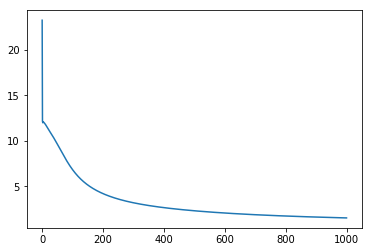

In [11]:
plt.plot(losses)

In [12]:
def forward_pass(X,input_to_hidden_weights,hidden_to_output_weights):
    m = X.shape[0]
    X_bias = np.hstack((np.ones((m,1)),X))
    hidden_X = activation(np.dot(X_bias,input_to_hidden_weights)) # m x h
    hidden_X = np.hstack((np.ones((m,1)),hidden_X)) # m x (h+1) for bias neuron
    output_X = activation(np.dot(hidden_X,hidden_to_output_weights))
    return output_X

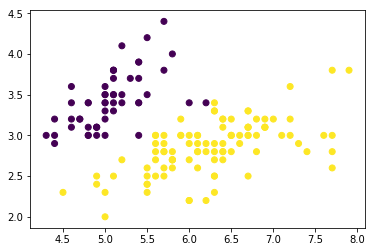

Actual


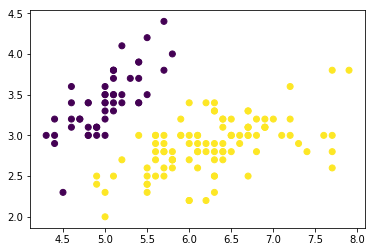

In [13]:
output_X = forward_pass(X,input_to_hidden_weights,hidden_to_output_weights)
Y_pred = np.rint(output_X[:,0])
plt.scatter(X[:,0],X[:,1],c = Y_pred)
plt.show()
print("Actual")
plt.scatter(X[:,0],X[:,1],c = Y[:,0])
plt.show()

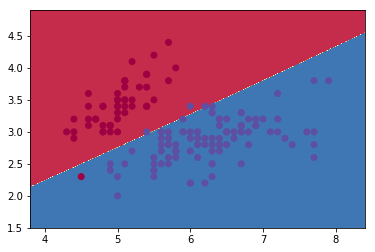

In [14]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
output_xx = forward_pass(np.c_[xx.ravel(), yy.ravel()],input_to_hidden_weights,hidden_to_output_weights)
output_xx[output_xx < 0.5] = 0
output_xx[output_xx >= 0.5] = 1
output_xx = np.rint(output_xx.reshape(xx.shape))
# Plot the contour and training examples
plt.contourf(xx, yy, output_xx, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=Y[:,0], cmap=plt.cm.Spectral)

In [15]:
def digit_vector(digit):
    v = np.zeros((10))
    v[digit] = 1
    return v

In [16]:
mndata = MNIST()
images, labels = mndata.load_training()
labels_train = [digit_vector(x) for x in labels]
labels_train = np.array(labels_train)
images_train = np.array(images)

images_test, labels_test = mndata.load_testing()
images_test = np.array(images_test)
labels_test = np.array(labels_test)

In [17]:
def stochastic_gradient_descent(X,Y,hidden_layer_num,output_layer_num,learning_rate=0.3,iterations=1000,batchsize=1000):
    # X: m x n where n = number of features
    # Y: m x c where c = number of classes for classification
    m = X.shape[0]
    n = X.shape[1]
    # Change X to m x (n+1) to add a bias node
    X = np.hstack((np.ones((m,1)),X))
    
    batches = m//batchsize
    if m%batchsize:
        batches+=1
    print("Starting stochastic gradient descent with the following parameters...")
    print("Size of hidden layer: {0}\nSize of output_layer: {1}".format(hidden_layer_num,output_layer_num))
    print("Batchsize: {0}".format(batchsize))
    print("Batches per iteration: {0}".format(batches))
    print("Number of iterations: {0}".format(iterations))
    print("Learning rate: {0}".format(learning_rate))
    #Initialize randomly between -1 and 1, and add bias
    # (n+1) x h where h = number of neurons in hidden layer
    input_to_hidden_weights = np.random.random((n+1,hidden_layer_num))*2 -1
    
    # (h+1) x c
    hidden_to_output_weights = np.random.random((hidden_layer_num+1,output_layer_num))*2-1
    losses = []
    for i in range(iterations):
        for j in range(batches):
            if j == batches-1:
                X_batch = X[j*batchsize:]
                Y_batch = Y[j*batchsize:]
            else:
                X_batch = X[j*batchsize:(j+1)*(batchsize)]
                Y_batch = Y[j*batchsize:(j+1)*(batchsize)]
            delta_hidden = np.zeros((hidden_layer_num+1,1))
            delta_input = np.zeros((n+1,1))

            # Forward pass to compute values of X
            hidden_X = activation(np.dot(X_batch,input_to_hidden_weights)) # m x h
            hidden_X = np.hstack((np.ones((X_batch.shape[0],1)),hidden_X)) # m x (h+1) for bias neuron
            output_X = activation(np.dot(hidden_X,hidden_to_output_weights)) # m x c

            # Calculate loss
            loss = loss_function(output_X,Y_batch)
            print("Iteration-Batch #{0}-{1} -- Loss: {2}".format(i,j,loss))
            losses.append(loss)

            # Backpropagation
            delta_hidden_to_output = (loss_function(output_X,Y_batch,derivative=True)*activation(output_X,derivative=True)) # m x c
            delta_input_to_hidden = np.dot(delta_hidden_to_output, hidden_to_output_weights[1:,:].T) # m x c . c x h = m x h
            delta_input_to_hidden = delta_input_to_hidden * activation(hidden_X[:,1:], derivative=True) # m x h

            #Calculate gradient and descend
            gradient_hidden_to_output_weights = delta_hidden_to_output[:,np.newaxis,:] * hidden_X[:,:,np.newaxis] # m x h+1 x c
            gradient_input_to_hidden_weights = delta_input_to_hidden[:,np.newaxis,:] * X_batch[:,:,np.newaxis] # m x n+1 x h

            hidden_to_output_weights -= np.average(gradient_hidden_to_output_weights,axis=0) * learning_rate
            input_to_hidden_weights -= np.average(gradient_input_to_hidden_weights,axis=0) * learning_rate
    
    print("Training complete")
    return (input_to_hidden_weights,hidden_to_output_weights,losses)


In [18]:
(input_to_hidden_weights,hidden_to_output_weights,losses) = stochastic_gradient_descent(images_train,labels_train,500,10,learning_rate=0.03,iterations=5,batchsize=1000)

Starting stochastic gradient descent with the following parameters...
Size of hidden layer: 500
Size of output_layer: 10
Batchsize: 1000
Batches per iteration: 60
Number of iterations: 5
Learning rate: 0.03
Iteration-Batch #0-0 -- Loss: 2078.5438225148196
Iteration-Batch #0-1 -- Loss: 3113.9231582321554
Iteration-Batch #0-2 -- Loss: 2997.321121555692
Iteration-Batch #0-3 -- Loss: 2619.9945361676437
Iteration-Batch #0-4 -- Loss: 2077.6204683250944
Iteration-Batch #0-5 -- Loss: 2015.0598006630587
Iteration-Batch #0-6 -- Loss: 1361.6354199089699
Iteration-Batch #0-7 -- Loss: 1717.435814398175
Iteration-Batch #0-8 -- Loss: 1354.5859541738419
Iteration-Batch #0-9 -- Loss: 1222.1544879943456
Iteration-Batch #0-10 -- Loss: 1021.2387793497336
Iteration-Batch #0-11 -- Loss: 1030.2589178619103
Iteration-Batch #0-12 -- Loss: 872.0383368258682
Iteration-Batch #0-13 -- Loss: 837.7191924520838
Iteration-Batch #0-14 -- Loss: 750.8999025829905
Iteration-Batch #0-15 -- Loss: 561.7505256499475
Iteration

Iteration-Batch #2-42 -- Loss: 129.8009661873491
Iteration-Batch #2-43 -- Loss: 105.19059100955593
Iteration-Batch #2-44 -- Loss: 114.97678370492585
Iteration-Batch #2-45 -- Loss: 124.8304576511359
Iteration-Batch #2-46 -- Loss: 126.6327075072054
Iteration-Batch #2-47 -- Loss: 137.9714745765482
Iteration-Batch #2-48 -- Loss: 104.55741187929436
Iteration-Batch #2-49 -- Loss: 145.55522470945115
Iteration-Batch #2-50 -- Loss: 124.86978576067332
Iteration-Batch #2-51 -- Loss: 103.61994346088122
Iteration-Batch #2-52 -- Loss: 129.2138464103681
Iteration-Batch #2-53 -- Loss: 108.32088545342825
Iteration-Batch #2-54 -- Loss: 100.01197922133797
Iteration-Batch #2-55 -- Loss: 94.68650009864966
Iteration-Batch #2-56 -- Loss: 110.61718824682465
Iteration-Batch #2-57 -- Loss: 105.62466450742042
Iteration-Batch #2-58 -- Loss: 64.1260492248912
Iteration-Batch #2-59 -- Loss: 76.07490985957753
Iteration-Batch #3-0 -- Loss: 107.33168351185283
Iteration-Batch #3-1 -- Loss: 102.82781217228626
Iteration-B

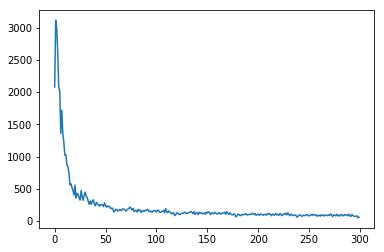

In [19]:
plt.plot(losses)

In [20]:
def predict_number(digit_probabilities):
    return np.argmax(digit_probabilities)

In [21]:
output_X = forward_pass(images_test,input_to_hidden_weights,hidden_to_output_weights)
predicted_labels = np.apply_along_axis(predict_number,axis=1,arr=output_X)
num_of_test = predicted_labels.shape[0]
classified_correctly = np.sum(predicted_labels == labels_test)
print("Classified correctly: {0}\nClassified wrongly: {1}\nAccuracy: {2}%".format(classified_correctly,
                                                                                num_of_test-classified_correctly,
                                                                                classified_correctly/num_of_test*100))

Classified correctly: 9248
Classified wrongly: 752
Accuracy: 92.47999999999999%
